https://www.youtube.com/watch?v=DlPrTGbO19E&list=PLguYJK7ydFE7R7KqRRVXw23kOrn6jiwqi&index=3

In [198]:
import math
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def distance(point1,point2):
    return math.sqrt((point2[0]-point1[0])**2 + (point2[1]-point1[1])**2)

In [19]:
x,y = np.array([[1,1],[2,2]])

In [20]:
distance(x,y)

1.4142135623730951

In [48]:
dist_list = []

def closest_point(all_points, new_point):
    
    best_point = None
    best_distance = None
    
    for current_data_point in all_points:
        #print(all_points[i])
        #dist_list.append(distance(current_data_point,new_point))
        
        current_distance = distance(current_data_point,new_point)
        
        if (best_distance is None) or (best_distance > current_distance):
            best_point = current_data_point
            best_distance = current_distance
            
    return best_point

In [58]:
closest_point(np.array([[1,1],[4,5],[-0.5,-6],[1.5,1.5]]),[2,2])

array([1.5, 1.5])

In [52]:
dist_list

[1.4142135623730951, 3.605551275463989]

In [77]:
# np.array([[2,2],[1,1],[4,5],[-0.5,-6]])

[0.10883 0.6319 ]


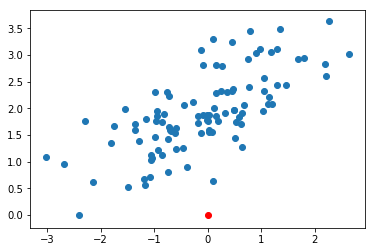

In [102]:
df = pd.read_csv('data.csv',header=None,names=['x','y'])
# df.head()
# df.info()
df_array = np.asarray(df)

new_point = [0,0]
print(closest_point(df_array,new_point))
plt.scatter(df['x'],df['y'])
plt.scatter(new_point[0],new_point[1],color='red')

## The above algo runs with a linear time complexity of O(n)

In [114]:
sorted(df_array,key=lambda df_array:df_array[0])

[array([-3.02296,  1.09255]),
 array([-2.67877,  0.95898]),
 array([-2.40724e+00, -1.56000e-03]),
 array([-2.29674,  1.75695]),
 array([-2.14926,  0.62285]),
 array([-1.79678,  1.35803]),
 array([-1.75223,  1.67   ]),
 array([-1.53513,  1.99668]),
 array([-1.49627,  0.53105]),
 array([-1.36115,  1.70969]),
 array([-1.34999,  1.59958]),
 array([-1.28802,  1.39474]),
 array([-1.19662,  0.66711]),
 array([-1.1711 ,  0.56924]),
 array([-1.15661,  1.79169]),
 array([-1.07619,  0.70874]),
 array([-1.05695,  1.11807]),
 array([-1.05659,  1.02226]),
 array([-1.03816,  1.06893]),
 array([-0.98641,  1.46602]),
 array([-0.9829 ,  2.30455]),
 array([-0.95727,  1.75579]),
 array([-0.95409,  1.86155]),
 array([-0.94159,  1.945  ]),
 array([-0.92159,  1.21538]),
 array([-0.85952,  1.7498 ]),
 array([-0.85601,  1.12981]),
 array([-0.81839,  1.88817]),
 array([-0.75463,  2.30161]),
 array([-0.74565,  0.81194]),
 array([-0.73591,  1.43076]),
 array([-0.72407,  2.23863]),
 array([-0.72071,  1.64845]),
 a

In [108]:
#df_array = np.asarray(df)
#df_array[:,0]

In [207]:
dim = 2

def build_kd_tree(points, depth=0):
    n = len(points)
    
    if n<=0:
        return None
    
    split_axis = depth % dim
    
    sorted_points = points.sort_values(df.columns[split_axis])
    
    #print(sorted_points.iloc[int(n/2)])
    return {
        'point':sorted_points.iloc[int(n/2)],
        'left_sub_tree':build_tree(sorted_points.iloc[:int(n/2)],depth+1),
        'right_sub_tree':build_tree(sorted_points.iloc[int(n/2)+1:],depth+1),
    }

In [208]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(build_kd_tree(df))

{   'left_sub_tree': {   'left_sub_tree': {   'left_sub_tree': {   'left_sub_tree': {   'left_sub_tree': {   'left_sub_tree': {   'left_sub_tree': None,
                                                                                                                                  'point': x   -2.40724
y   -0.00156
Name: 1, dtype: float64,
                                                                                                                                  'right_sub_tree': None},
                                                                                                             'point': x   -1.49627
y    0.53105
Name: 16, dtype: float64,
                                                                                                             'right_sub_tree': {   'left_sub_tree': None,
                                                                                                                                   'point': x   -2.14926
y    0.62285
Name: 59, dt

                                                                                          'right_sub_tree': {   'left_sub_tree': {   'left_sub_tree': None,
                                                                                                                                     'point': x    0.64965
y    1.28183
Name: 84, dtype: float64,
                                                                                                                                     'right_sub_tree': None},
                                                                                                                'point': x    0.62822
y    1.71526
Name: 36, dtype: float64,
                                                                                                                'right_sub_tree': None}},
                                                                     'point': x    0.64556
y    1.91470
Name: 47, dtype: float64,
                                                   

In [218]:
def closest_point(root, point, depth = 0, best=None):
    if root is None:
        return best
    
    split_axis = depth % dim
    
    next_best = None
    next_branch = None
    
    if best is None or distance(point,best)>distance(point,root['point']):
        next_best = root['point']
    else:
        next_best = best
        
    if point[split_axis] < root['point'][split_axis]:
        next_branch = root['left_sub_tree']
    else:
        next_branch = root['right_sub_tree']
        
    return closest_point(next_branch,point,depth+1,next_best)

In [220]:
closest_point(build_kd_tree(df),new_point)

x   -0.37855
y    0.90172
Name: 66, dtype: float64

In [217]:
build_kd_tree(df)['point'][0]

0.00099